# Introductions

FINAL PROJECT

Nama        : 

- Chairul Rifky Andika
- Muhammad Septian Zamzani
- Gerwyn Zulqarnain
- San Gabriel Vanness Kenrick Erwi
- Surya Karunia Ramadhan

Batch       : HCK-021

Objective   : 

Help companies adjust marketing strategies to increase sales based on sentiment analysis of product that have been sold.

# Background

We are data scientist from a mobile phone company, we were tasked with conducting sentiment analysis on reviews left by customers who shopped online. This is motivated by a decline in the smartphone market in Indonesia of 6% in the second semester (July-December) 2023 and 10% in the first semester (January-June) 2023. This analysis aims to help companies increase sales amidst the challenges of a declining market. Product reviews are an important indicator because potential buyers often use them as a reference for experiences from other customers. Reviews cover various aspects, such as product quality, function, durability, service, and delivery duration. Additionally, reviews also reflect customer satisfaction levels, which can be used to evaluate whether the product meets their needs and expectations. Through this sentiment analysis, companies hope to identify customer feedback patterns to design more effective sales increase strategies. This step is an important basis for improving customer experience and strengthening product competitiveness in a competitive market.

# SMART Framework

S : Increase Sales

M : Increase sales by 10%

A : Focus budget on targeted marketing to reduce marketing cost

R : Create different marketing strategy by understanding customer behavior

T : Project due in 1 year

# Problem Statement

Increase sales by 10% in one year by creating different marketing strategy based on customer behavior and reduce marketing cost .

# Problem Breakdown

How are the distribution of the brand?

What brand are most sold?

What are the average price of most sold product?

How are the sales of products with the highest ram?

How are the sales of products with the highest rom?

What are the most word mention in negative comments?

# Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from wordcloud import WordCloud

import re
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/Rifky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Rifky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Loading

In [2]:
# Read CSV wihtout header
df = pd.read_csv('analyst.csv')
df

,name,price,rating,sold,ram,rom,brand,location
0,Asus Zenfone 10 8/128GB - Starry Blue,8999000.0,4.8,60,8,128,asus,Kab. Tangerang
1,Asus Zenfone 10 8/128GB - Aurora Green,8999000.0,4.9,60,8,128,asus,Kab. Tangerang
2,Asus Zenfone 10 8/128GB - Eclipse Red,8999000.0,5.0,70,8,128,asus,Kab. Tangerang
3,Asus Zenfone 10 8/128GB - Comet White,8999000.0,4.8,50,8,128,asus,Kab. Tangerang
4,Asus Zenfone 10 8/128GB - Midnight Black,8999000.0,4.9,100,8,128,asus,Kab. Tangerang
...,...,...,...,...,...,...,...,...
256,Infinix Note 40 Pro+ 5G 12/256GB - Up to 24GB ...,3949000.0,4.9,250,12,256,infinix,Jakarta Utara
257,Infinix Note 40 Pro 5G 8/256GB - Up to 16GB Ex...,3799000.0,4.9,1000,8,256,infinix,Jakarta Utara
258,Infinix Note 30 8/256GB - Up To 16GB - 120 HZ ...,2599000.0,4.9,1000,8,256,infinix,Jakarta Utara
259,Infinix Note 30 PRO 8/256GB -Up To 16GB- 108MP...,3199000.0,4.9,1000,8,256,infinix,Jakarta Utara


# Data Cleaning

In [3]:
# Check data duplicate
df.duplicated().sum()

14

In [4]:
# Drop duplicate
df = df.drop_duplicates(keep=False)
df

,name,price,rating,sold,ram,rom,brand,location
0,Asus Zenfone 10 8/128GB - Starry Blue,8999000.0,4.8,60,8,128,asus,Kab. Tangerang
1,Asus Zenfone 10 8/128GB - Aurora Green,8999000.0,4.9,60,8,128,asus,Kab. Tangerang
2,Asus Zenfone 10 8/128GB - Eclipse Red,8999000.0,5.0,70,8,128,asus,Kab. Tangerang
3,Asus Zenfone 10 8/128GB - Comet White,8999000.0,4.8,50,8,128,asus,Kab. Tangerang
4,Asus Zenfone 10 8/128GB - Midnight Black,8999000.0,4.9,100,8,128,asus,Kab. Tangerang
...,...,...,...,...,...,...,...,...
252,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000.0,4.9,5000,12,256,vivo,Kab. Tangerang
253,"vivo Y02 (3/32) - Dynamic Design, 5000mAh Batt...",1499000.0,4.9,250,3,32,vivo,Kab. Tangerang
254,"vivo Y35 (8/128) - RAM 8GB+8GB Extended, 44W F...",3399000.0,4.9,1000,8,128,vivo,Kab. Tangerang
255,Infinix Note 40S 8/256GB - Up to 16GB Extended...,2749000.0,4.9,500,8,256,infinix,Jakarta Utara


In [5]:
# Drop row with nan value
df = df.dropna()

In [6]:
# Check value
print(df['price'].unique())

[8.99900e+06 1.19990e+07 9.99900e+06 7.99900e+06 6.99900e+06 3.94900e+06
 3.09900e+06 3.49900e+06 2.99900e+06 2.19900e+06 4.29900e+06 3.99900e+06
 4.04900e+06 1.79900e+06 4.89900e+06 2.69900e+06 2.09900e+06 1.49990e+07
 8.49900e+06 5.99900e+06 1.99900e+06 2.49900e+06 5.19900e+06 2.39900e+06
 7.49900e+06 4.99900e+06 2.29900e+06 1.74900e+06 1.09990e+07 1.59990e+07
 4.19900e+06 3.19900e+06 2.99000e+06 2.59900e+06 1.49900e+06 4.49900e+06
 4.29000e+06 7.19000e+06 3.69900e+06 9.99900e+07 2.89900e+06 9.90000e+07
 1.00000e+08 9.89900e+06 3.39900e+06 1.69900e+06 3.66600e+06 4.88800e+06
 9.59900e+06 3.79900e+06 5.69900e+06 1.59900e+06 5.89900e+06 1.24900e+06
 3.59900e+06 3.34980e+07 5.50950e+06 6.26950e+06 1.86195e+07 3.84700e+06
 1.99450e+06 1.39900e+06 4.09900e+06 2.79990e+07 1.89990e+07 1.56500e+07
 5.39900e+06 2.98000e+06 1.39990e+07 2.99990e+07 2.69990e+07 2.49990e+07
 1.79990e+07 6.39900e+06 2.19990e+07 1.19900e+06 2.79900e+06 4.59900e+06
 1.34990e+07 5.49900e+06 6.49900e+06 1.94900e+06 3.

In [8]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 256
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      233 non-null    object 
 1   price     233 non-null    float64
 2   rating    233 non-null    float64
 3   sold      233 non-null    int64  
 4   ram       233 non-null    int64  
 5   rom       233 non-null    int64  
 6   brand     233 non-null    object 
 7   location  233 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 16.4+ KB


# Exploratory Data Analysis

### How are the distribution of the brand?

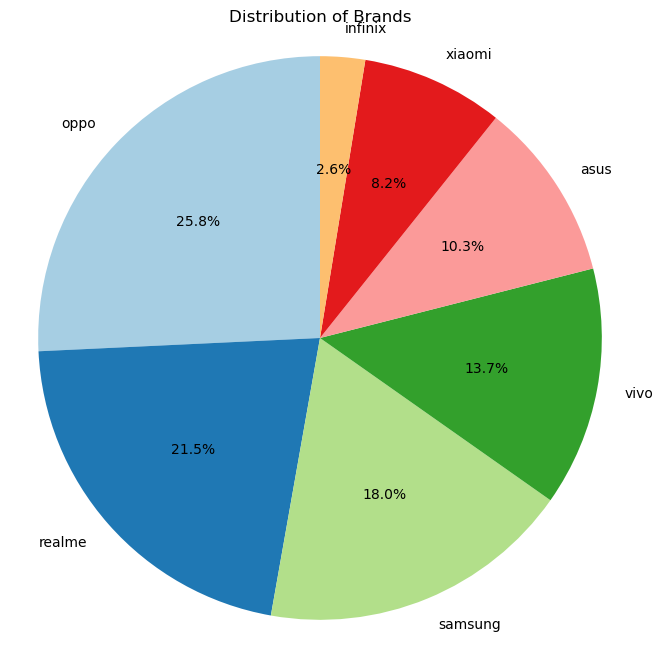

In [9]:
# Count the occurrences of each brand
brand_counts = df['brand'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This chart shows the variance of the brand available at the market. This indicates Oppo has more variance compare to others.

### What brand are most sold?

In [10]:
brand_sales = df.groupby('brand')['sold'].sum()

# Find the most sold brand
most_sold_brand = brand_sales.idxmax()  # Brand with the highest total sales
most_sold_quantity = brand_sales.max()  # Total quantity sold for that brand

# Display the result
print(f"The most sold brand is '{most_sold_brand}' with a total quantity of {most_sold_quantity} units.")

# Optional: Display all brand sales
print("\nTotal sales by brand:")
print(brand_sales)


The most sold brand is 'xiaomi' with a total quantity of 66100 units.

Total sales by brand:
brand
asus        1218
infinix     5500
oppo       29529
realme      6269
samsung    37785
vivo       18135
xiaomi     66100
Name: sold, dtype: int64


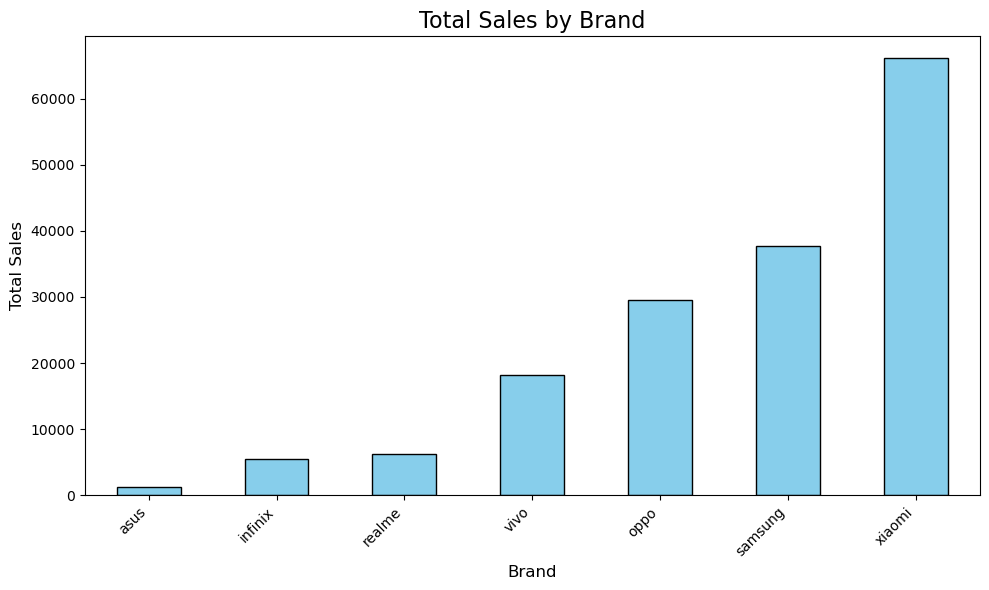

In [11]:
# Group the data by brand and sum the sold quantities
brand_sales = df.groupby('brand')['sold'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
brand_sales.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Sales by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate brand names for better visibility
plt.tight_layout()

# Show the plot
plt.show()

The most sold brand is Xiaomi with a total quantity of 66100 units. This indicates Xiaomi offers devices with powerful processors, ample RAM, and generous ROM at a fraction of the cost of other premium brands. Xiaomi has earned a reputation for offering durable products with a good user experience, further incentivizing purchases.

### What are the average price of most sold product?

In [12]:
# Filter the rows for the Xiaomi brand
xiaomi_data = df[df['brand'].str.lower() == 'xiaomi']  # Case-insensitive filtering

# Calculate the average price of Xiaomi products
average_price = xiaomi_data['price'].mean()

# Display the result
print(f"The average price of Xiaomi products is: {average_price:,.2f}")

The average price of Xiaomi products is: 3,464,789.47


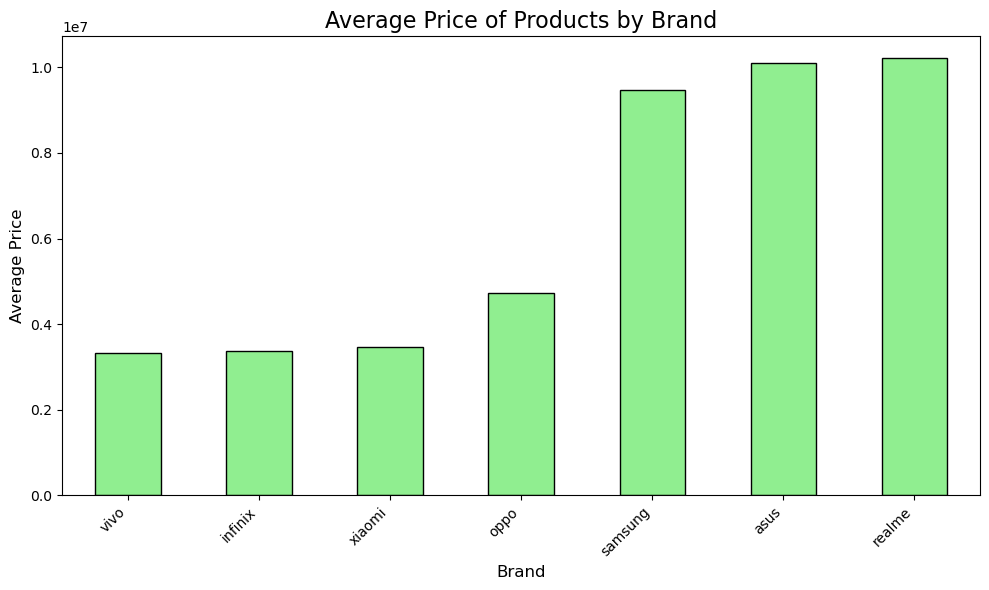

In [13]:
# Group the data by brand and calculate the average price
average_price_by_brand = df.groupby('brand')['price'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_price_by_brand.sort_values().plot(kind='bar', color='lightgreen', edgecolor='black')

# Add titles and labels
plt.title('Average Price of Products by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate brand names for better visibility
plt.tight_layout()

# Show the plot
plt.show()

The average price of Xiaomi is Rp 3.464.789,47. This indicates Xiaomi consistently offers competitive pricing across its product range. Customers seeking high-quality smartphones and gadgets at a lower price point are drawn to Xiaomi.

### How are the sales of products with the highest ram?

<Axes: xlabel='ram'>

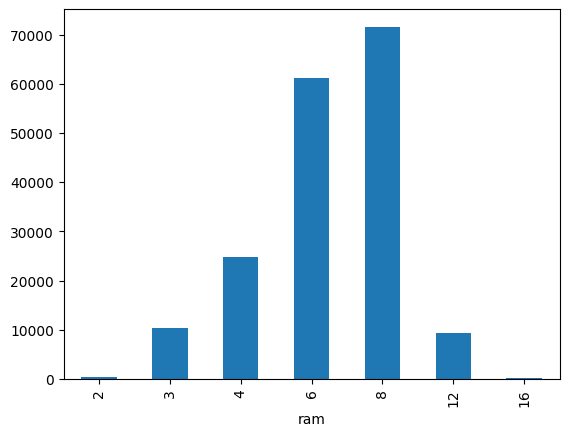

In [48]:
df.groupby('ram')['sold'].sum().plot(kind='bar')

In [15]:
# Filter rows where RAM is 8GB
ram_8gb_data = df[df['ram'] == 8]

# Group by brand and calculate the total sold units for 8GB RAM
brand_sales_ram_8gb = ram_8gb_data.groupby('brand')['sold'].sum()

# Find the most sold brand with 8GB RAM
most_sold_brand_8gb = brand_sales_ram_8gb.idxmax()  # Brand with the highest total sales
most_sold_quantity_8gb = brand_sales_ram_8gb.max()  # Total quantity sold for that brand

# Display the result
print(f"The most sold brand with 8GB RAM is '{most_sold_brand_8gb}' with a total quantity of {most_sold_quantity_8gb} units.")


The most sold brand with 8GB RAM is 'samsung' with a total quantity of 21564 units.


8GB RAM offers sufficient memory for smooth multitasking, gaming, and handling multiple applications simultaneously without significant lag. Samsung's devices with 8GB of RAM ensure better performance for users who need to run several apps at once or play memory-intensive games.
For many, the 8GB RAM strikes the right balance between price and performance, offering excellent multitasking capabilities without going for the more expensive 12GB or 16GB versions.

### How are the sales of products with the highest rom?

<Axes: xlabel='rom'>

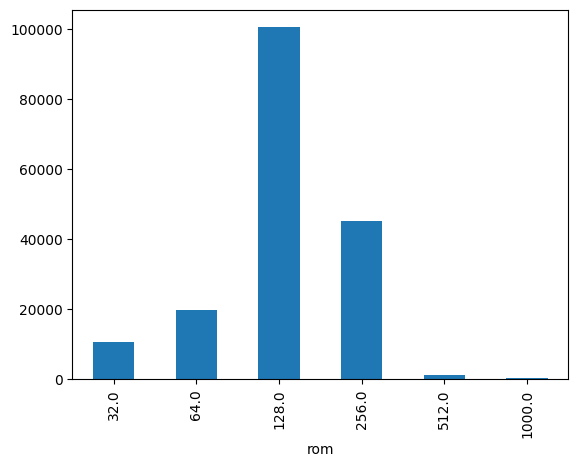

In [47]:
df.groupby('rom')['sold'].sum().plot(kind='bar')

In [16]:
# Filter rows where ROM is 128GB
rom_128gb_data = df[df['rom'] == 128]

# Group by brand and calculate the total sold units for 128GB ROM
brand_sales_rom_128gb = rom_128gb_data.groupby('brand')['sold'].sum()

# Find the most sold brand with 128GB ROM
most_sold_brand_128gb = brand_sales_rom_128gb.idxmax()  # Brand with the highest total sales
most_sold_quantity_128gb = brand_sales_rom_128gb.max()  # Total quantity sold for that brand

# Display the result
print(f"The most sold brand with 128GB ROM is '{most_sold_brand_128gb}' with a total quantity of {most_sold_quantity_128gb} units.")


The most sold brand with 128GB ROM is 'xiaomi' with a total quantity of 66100 units.


Xiaomi is known for offering smartphones with competitive pricing. People often buy Xiaomi phones because they provide premium features (such as 128GB storage, solid performance, and good cameras) at affordable prices, making them a great value for money, especially when compared to competitors. Xiaomi's cost-effectiveness appeals to users who want a smartphone with more storage without breaking the bank.

### What are the most word mention in negative comments?

In [17]:
df1 = pd.read_csv('data_final.csv')
df1

,Review,Rating
0,Beli Online memang paling aman di official store,bintang 5
1,"Barang masih di segel, tepat waktu, dan packin...",bintang 5
2,"mantab greget, penguriman aman,sampai tujuan s...",bintang 5
3,"pertama kali beli online, aman. packing rapi",bintang 5
4,"Barang bagus, berfungsi dengan baik, untuk pen...",bintang 4
...,...,...
19535,Pesanan sudah diterima dengan baik packing ama...,bintang 5
19536,"pengiriman aman dan cepat,,terima kasih.",bintang 5
19537,Mantap deh buat poco Indonesia barang bagus pe...,bintang 5
19538,Barang original dan masih segel. Pengiriman ju...,bintang 5


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19540 entries, 0 to 19539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  19540 non-null  object
 1   Rating  19540 non-null  object
dtypes: object(2)
memory usage: 305.4+ KB


In [19]:
print(df1['Rating'].unique())

['bintang 5' 'bintang 4' 'bintang 3' 'bintang 2' 'bintang 1']


In [20]:
# Hapus simbol '+' dan tulisan 'terjual' lalu ganti tipe data ke integer
df1['Rating'] = df1['Rating'].str.replace('bintang ', '')
df1['Rating'] = df1['Rating'].astype(int)

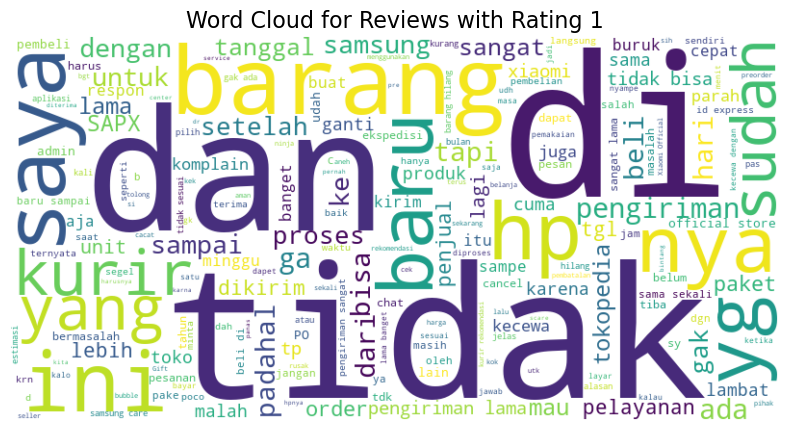

In [21]:
# Filter rows where rating < 3
low_rating_reviews = df1[df1['Rating'] == 1]

# Combine all review text into a single string
text_data = " ".join(low_rating_reviews['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title("Word Cloud for Reviews with Rating 1", fontsize=16)
plt.show()

Based on the displayed word cloud, here are some insights that may explain the primary causes of 1-star reviews:

1. Shipping Issues:
    - Words like "barang", "kurir", "pengiriman", and "sampai" indicate delays, inefficient couriers, or goods not arriving as the main complaints.

2. Product Quality Problems:
    - Words such as "tidak", "barang", "hp", and "tidak sesuai" suggest that customers received items that did not match their expectations or descriptions.

3. Poor Customer Service:
    - Terms like "komplain", "admin," "jawab", and "respon" highlight dissatisfaction with slow or inadequate customer support.

4. Difficult Return or Claim Processes:
    - Words like "ganti", "proses", and "tidak bisa" point to challenges with return or warranty claims, which customers may find overly complicated or unsatisfactory.

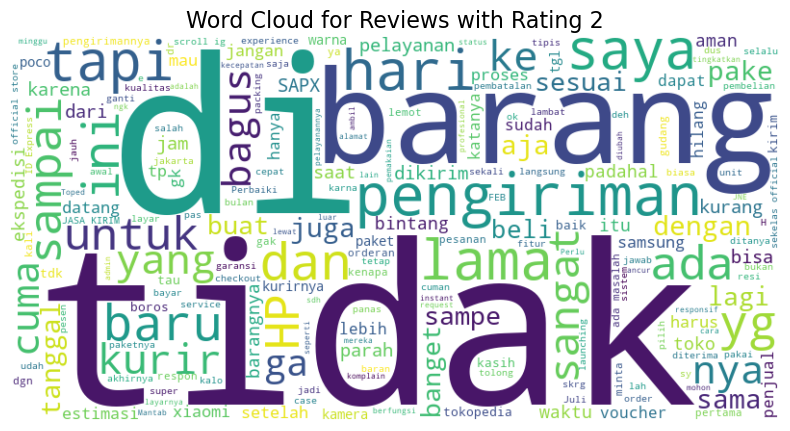

In [22]:
# Filter rows where rating < 3
low_rating_reviews = df1[df1['Rating'] == 2]

# Combine all review text into a single string
text_data = " ".join(low_rating_reviews['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title("Word Cloud for Reviews with Rating 2", fontsize=16)
plt.show()

Based on the displayed word cloud, here are some insights that may explain the primary causes of 2-star reviews:

1. Shipping Issues Persist:
    - Words like "barang", "kurir, "pengiriman", "lama", and "sampai" suggest that shipping delays and issues with couriers are still a significant source of frustration.

2. Product Quality Improvements:
    - Positive words like "bagus" and "sesuai" appear, indicating that some customers are satisfied with the product quality. However, "tidak" is still dominant, reflecting that unmet expectations remain a concern.

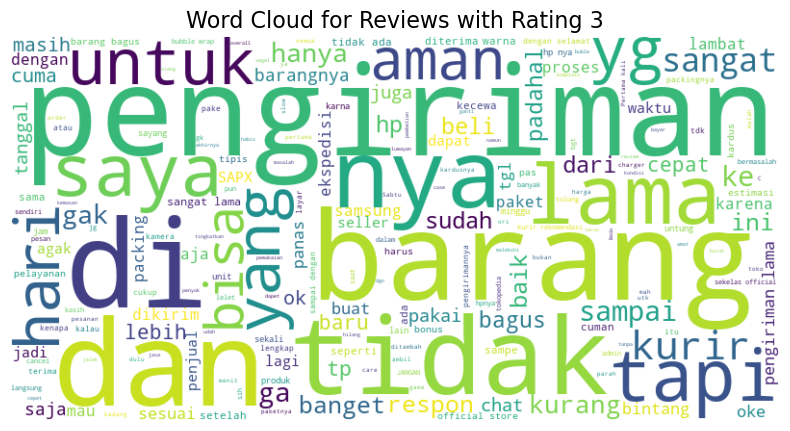

In [23]:
# Filter rows where rating < 3
low_rating_reviews = df1[df1['Rating'] == 3]

# Combine all review text into a single string
text_data = " ".join(low_rating_reviews['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title("Word Cloud for Reviews with Rating 3", fontsize=16)
plt.show()

Based on the displayed word cloud, here are some insights that may explain the primary causes of 3-star reviews:

Shipping and Delivery Are Still Key Issues:

- Words like "pengiriman", "barang" (goods), "kurir", "lama", and "sampai" remain significant. However, there’s a slight improvement in perception compared to 1-star and 2-star reviews.

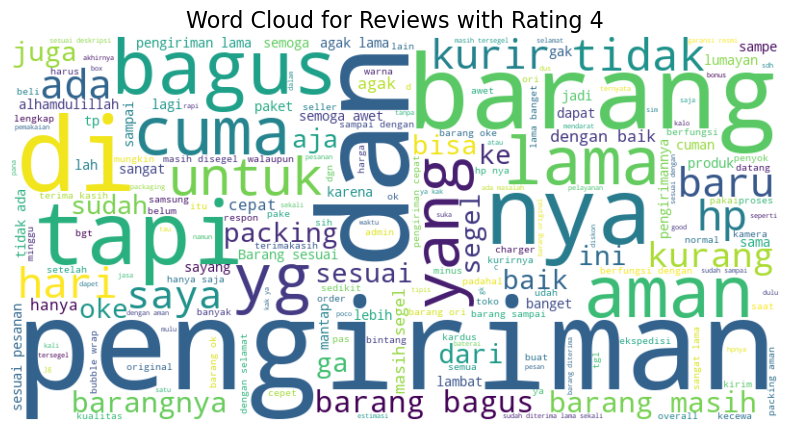

In [24]:
# Filter rows where rating < 3
low_rating_reviews = df1[df1['Rating'] == 4]

# Combine all review text into a single string
text_data = " ".join(low_rating_reviews['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title("Word Cloud for Reviews with Rating 4", fontsize=16)
plt.show()

Words such "bagus", "aman", "barang", "proses" are mention in the 4 rating wordclouds. This indicates variety of reasons, often driven by customer satisfaction with a product or service such as good product quality or fast delivery service.

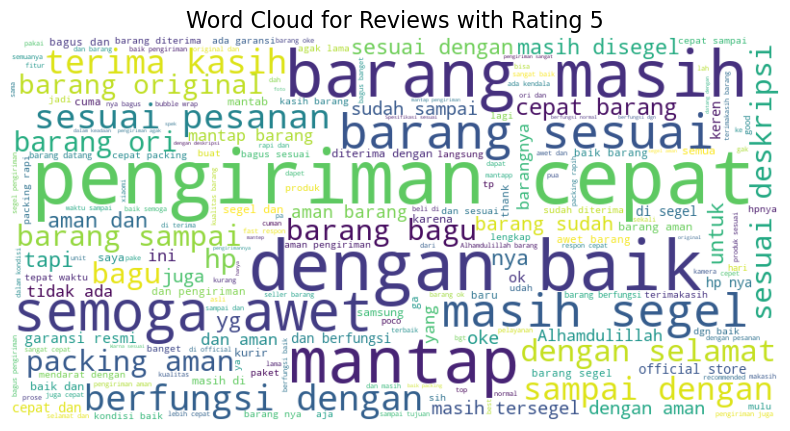

In [25]:
# Filter rows where rating < 3
low_rating_reviews = df1[df1['Rating'] == 5]

# Combine all review text into a single string
text_data = " ".join(low_rating_reviews['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title("Word Cloud for Reviews with Rating 5", fontsize=16)
plt.show()

Words such "cepat", "aman", "awet", "sesuai", "mantap" are mention in the 5 rating wordclouds. This indicates variety of reasons, often driven by customer satisfaction with a product or service such as good product quality, fast delivery service, value of money, and or user experience.

# Conclusions

Xiaomi consistently offers competitive pricing across its product range. Customers seeking high-quality smartphones and gadgets at a lower price point are drawn to Xiaomi. Xiaomi offers devices with powerful processors, ample RAM, and generous ROM at a fraction of the cost of other premium brands. Xiaomi is popular in regions like Southeast Asia, India, and China due to their affordability, reliability, and reputation for offering durable products with a good user experience, further incentivizing purchases.

Realme invests in stylish, modern designs and vibrant color options to appeal to younger audiences. Many Realme products offer premium features like high-refresh-rate displays (90Hz/120Hz), large screens, and slim designs at mid-range prices. Realme consistently receives high user ratings for its price-to-performance ratio, battery life, and camera quality.

There are several reasons why people might prefer buying Samsung smartphones with 8GB RAM. Samsung is a globally recognized and trusted brand with a long history of producing high-quality, durable, and innovative smartphones. People often trust Samsung for its consistent performance and after-sales service. 8GB RAM offers sufficient memory for smooth multitasking, gaming, and handling multiple applications simultaneously without significant lag. Samsung's devices with 8GB of RAM ensure better performance for users who need to run several apps at once or play memory-intensive games. For many, the 8GB RAM strikes the right balance between price and performance, offering excellent multitasking capabilities without going for the more expensive 12GB or 16GB versions.

Across the reviews (1-star, 2-star, and 3-star), the following themes consistently emerge as the key factors influencing customer satisfaction levels:

1. Shipping and Delivery Issues Dominate Dissatisfaction:
    - Delays in delivery, inefficient courier services, and inconsistencies in shipment timelines are the most significant sources of frustration. This issue is prevalent in all three ratings, although there is a slight improvement in perception as the ratings increase.

2. Product Quality Influences Ratings:
    - In 1-star reviews, unmet expectations regarding product quality are a major complaint. By the time we reach 2-star and 3-star reviews, some positive feedback emerges, suggesting that product quality meets expectations for a subset of customers.

3. Customer Service Needs Improvement:
    - Poor responsiveness, slow resolutions, and inadequate support heavily impact 1-star reviews. Although not as prominent in higher ratings, these issues likely contribute to customers’ reluctance to give higher scores.

4. Progression in Positive Sentiment:
    - Moving from 1-star to 3-star reviews, terms like "bagus" (good), "aman" (safe), and "sesuai" (as expected) begin to appear, indicating incremental improvements in customer experiences. However, the persistence of negative sentiments like "lama" (slow) and "tidak" (not) underscores unresolved issues.

# Business Recommendation

1. Enhance Shipping and Delivery Experience
    - Partner with reliable logistics providers to ensure timely delivery.
    - Implement real-time tracking systems to improve transparency for customers.
    - Offer expedited shipping options for a small fee to cater to customers prioritizing speed.
    - Use post-purchase notifications to update customers proactively about delivery progress and delays.

2. Improve Product Quality and Customer Expectations
    - Conduct quality checks to ensure that products meet customer expectations before shipping.
    - Include detailed product descriptions, high-resolution images, and customer reviews on listings to set accurate expectations.

3. Strengthen Customer Service and Support
    - Train customer service teams to respond quickly and empathetically to complaints.
    - Implement AI-powered chatbots for instant responses to common queries, especially during peak times.
    - Offer proactive outreach to customers who leave low ratings, offering resolutions or discounts as compensation.

4. Incentivize Positive Customer Sentiment
    - Encourage satisfied customers to leave reviews by offering discounts or loyalty points.
    - Highlight positive reviews in marketing campaigns to reinforce the brand’s strengths, such as product durability, design, or affordability.
    - Create referral programs where customers who recommend your products receive discounts or cashback.

5. Stock More Smartphones with 8GB RAM
    - Increase inventory of smartphones with 8GB RAM, especially models from popular brands like Samsung, Realme, and Xiaomi.
    - Highlight the benefits of 8GB RAM in marketing campaigns, targeting gamers, multitaskers, and professionals who value performance without overpaying for higher RAM options.
    - Collaborate with brands to offer exclusive deals on 8GB RAM models, such as discounts, cashback, or freebies like protective cases or accessories.